---
# <font color=green>1. MEU PRIMEIRO SCRAPING

## 1.1. Introdução

## *Web Scraping* é o termo utilizado para definir a prática de coletar automaticamente informações na Internet. Isto é feito, geralmente, por meio de programas que simulam a navegação humana na Web.

## 1.2. Ambiente e bibliotecas
### Utilizaremos em nosso treinamento o navegador Google Chrome

In [4]:
import bs4
import urllib.request as urllib_request
import pandas

print("BeautifulSoup ->", bs4.__version__)
print("urllib ->", urllib_request.__version__)
print("pandas ->", pandas.__version__)

BeautifulSoup -> 4.6.3
urllib -> 3.7
pandas -> 1.1.5


## 1.3. Meu primeiro scraping

In [5]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = 'https://alura-site-scraping.herokuapp.com/hello-world.php'

response = urlopen(url)
html = response.read()

soup = BeautifulSoup(html, 'html.parser')
print(soup.find('h1',id='hello-world').get_text())
print(soup.find('p').get_text())

Hello World!!!
Web Scraping é o termo utilizado para definir a prática de coletar automaticamente informações na Internet. Isto é feito, geralmente, por meio de programas que simulam a navegação humana na Web.


---
# <font color=green>2. OBTENDO E TRATANDO O CONTEÚDO DE UM HTML

## 2.1. Entendendo a web

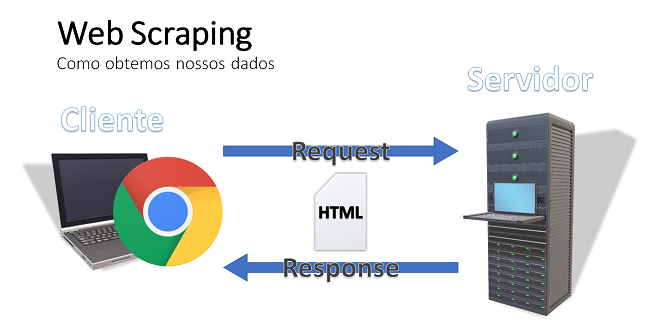

## 2.2. Obtendo o conteúdo HTML de um site

In [6]:
from urllib.request import urlopen

url = 'https://alura-site-scraping.herokuapp.com/hello-world.php'

response = urlopen(url)
html = response.read()
html

b'<!DOCTYPE html>\r\n<html lang="pt-br">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\r\n\r\n    <title>Alura Motors</title>\r\n\t<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous">\r\n\t<link rel="stylesheet" href="css/styles.css" media="all">\r\n\r\n\t<script src="https://code.jquery.com/jquery-1.12.4.js"></script>\r\n\t<script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js" integrity="sha384-Tc5IQib027qvyjSMfHjOMaLkfuWVxZxUPnCJA7l2mCWNIpG9mGCD8wGNIcPD7Txa" crossorigin="anonymous"></script>\r\n\t<script type="text/javascript" src="js/index.js"></script>\r\n\r\n</head>\r\n<body cz-shortcut-listen="true">\r\n    <noscript>You need to enable JavaScript to run this app.</noscript>\r\n\r\n    <div id="root">\r\n        <h

### urllib.request
#### https://docs.python.org/3/library/urllib.html

In [7]:
from urllib.request import Request, urlopen
from urllib.error import URLError, HTTPError

url = 'https://www.alura.com.br'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36'}

try:
    response = urlopen(url)
    html = response.read()
    html
except HTTPError as e:
    print(e.status, e.reason)

except URLError as e:
    print(e.reason)

403 Forbidden


#### https://docs.python.org/3/library/urllib.request.html#urllib.request.Request

In [8]:
from urllib.request import Request, urlopen
from urllib.error import URLError, HTTPError

url = 'https://alura-site-scraping.herokuapp.com/index.php'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36'}

try:
    req = Request(url, headers = headers)
    response = urlopen(req)
    html = response.read()
    print(html)

except HTTPError as e:
    print(e.status, e.reason)

except URLError as e:
    print(e.reason)

b'<!DOCTYPE html>\r\n<html lang="pt-br">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\r\n\r\n    <title>Alura Motors</title>\r\n\r\n\t<style>\r\n\t\t/*Regra para a animacao*/\r\n\t\t@keyframes spin {\r\n\t\t\t0% { transform: rotate(0deg); }\r\n\t\t\t100% { transform: rotate(360deg); }\r\n\t\t}\r\n\t\t/*Mudando o tamanho do icone de resposta*/\r\n\t\tdiv.glyphicon {\r\n\t\t\tcolor:#6B8E23;\r\n\t\t\tfont-size: 38px;\r\n\t\t}\r\n\t\t/*Classe que mostra a animacao \'spin\'*/\r\n\t\t.loader {\r\n\t\t\tborder: 16px solid #f3f3f3;\r\n\t\t\tborder-radius: 50%;\r\n\t\t\tborder-top: 16px solid #3498db;\r\n\t\t\twidth: 80px;\r\n\t\t\theight: 80px;\r\n\t\t\t-webkit-animation: spin 2s linear infinite;\r\n\t\t\tanimation: spin 2s linear infinite;\r\n\t\t}\r\n\t</style>\r\n\t<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuH

## 2.3. Tratamento de string

In [9]:
type(html)

bytes

### Convertando o tipo bytes para string

In [10]:
html = html.decode('utf-8')

In [11]:
type(html)

str

### Eliminando os caracteres de tabulação, quebra de linha etc.

In [12]:
html.split()

['<!DOCTYPE',
 'html>',
 '<html',
 'lang="pt-br">',
 '<head>',
 '<meta',
 'charset="utf-8">',
 '<meta',
 'name="viewport"',
 'content="width=device-width,',
 'initial-scale=1,',
 'shrink-to-fit=no">',
 '<title>Alura',
 'Motors</title>',
 '<style>',
 '/*Regra',
 'para',
 'a',
 'animacao*/',
 '@keyframes',
 'spin',
 '{',
 '0%',
 '{',
 'transform:',
 'rotate(0deg);',
 '}',
 '100%',
 '{',
 'transform:',
 'rotate(360deg);',
 '}',
 '}',
 '/*Mudando',
 'o',
 'tamanho',
 'do',
 'icone',
 'de',
 'resposta*/',
 'div.glyphicon',
 '{',
 'color:#6B8E23;',
 'font-size:',
 '38px;',
 '}',
 '/*Classe',
 'que',
 'mostra',
 'a',
 'animacao',
 "'spin'*/",
 '.loader',
 '{',
 'border:',
 '16px',
 'solid',
 '#f3f3f3;',
 'border-radius:',
 '50%;',
 'border-top:',
 '16px',
 'solid',
 '#3498db;',
 'width:',
 '80px;',
 'height:',
 '80px;',
 '-webkit-animation:',
 'spin',
 '2s',
 'linear',
 'infinite;',
 'animation:',
 'spin',
 '2s',
 'linear',
 'infinite;',
 '}',
 '</style>',
 '<link',
 'rel="stylesheet"',
 'hre

In [13]:
" ".join(html.split())

'<!DOCTYPE html> <html lang="pt-br"> <head> <meta charset="utf-8"> <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"> <title>Alura Motors</title> <style> /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao \'spin\'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } </style> <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous"> <link rel="stylesheet" href="css/styles.css" media="all"> <script src="https://code.jquery.com/jquery-1.12.4.js"></script> <script src="https://

### Eliminando os espaços em branco entre as TAGS

In [14]:
" ".join(html.split()).replace('> <', '><')

'<!DOCTYPE html><html lang="pt-br"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><title>Alura Motors</title><style> /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao \'spin\'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } </style><link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous"><link rel="stylesheet" href="css/styles.css" media="all"><script src="https://code.jquery.com/jquery-1.12.4.js"></script><script src="https://maxcdn.boo

### Função de tratamento de strings

In [15]:
def trata_html(input):
    return " ".join(input.split()).replace('> <', '><')

In [16]:
html

'<!DOCTYPE html>\r\n<html lang="pt-br">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\r\n\r\n    <title>Alura Motors</title>\r\n\r\n\t<style>\r\n\t\t/*Regra para a animacao*/\r\n\t\t@keyframes spin {\r\n\t\t\t0% { transform: rotate(0deg); }\r\n\t\t\t100% { transform: rotate(360deg); }\r\n\t\t}\r\n\t\t/*Mudando o tamanho do icone de resposta*/\r\n\t\tdiv.glyphicon {\r\n\t\t\tcolor:#6B8E23;\r\n\t\t\tfont-size: 38px;\r\n\t\t}\r\n\t\t/*Classe que mostra a animacao \'spin\'*/\r\n\t\t.loader {\r\n\t\t\tborder: 16px solid #f3f3f3;\r\n\t\t\tborder-radius: 50%;\r\n\t\t\tborder-top: 16px solid #3498db;\r\n\t\t\twidth: 80px;\r\n\t\t\theight: 80px;\r\n\t\t\t-webkit-animation: spin 2s linear infinite;\r\n\t\t\tanimation: spin 2s linear infinite;\r\n\t\t}\r\n\t</style>\r\n\t<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHA

In [17]:
html = trata_html(html)
print(html)

<!DOCTYPE html><html lang="pt-br"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><title>Alura Motors</title><style> /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao 'spin'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } </style><link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous"><link rel="stylesheet" href="css/styles.css" media="all"><script src="https://code.jquery.com/jquery-1.12.4.js"></script><script src="https://maxcdn.bootst

---
# <font color=green>3. INTRODUÇÃO AO BEAUTIFULSOUP

## 3.1. HTML da nossa página

### **HTML**
**HTML** (*HyperText Markup Language*) é uma linguagem de marcação composta por **tags** que deteminam o papel que cada parte do documento vai assumir. As **tags** são formadas pelo seu nome e atributos. Os atributos servem para configurar e também modificar as características padrões de uma **tag**.

## Estrutura básica

```html
<html>
    <head>
        <meta charset="utf-8" />
        <title>Alura Motors</title>
    </head>
    <body>
        <div id="container">
            <h1>Alura</h1>
            <h2 class="formato">Cursos de Tecnologia</h2>
            <p>Você vai estudar, praticar, discutir e aprender.</p>
            <a href="https://www.alura.com.br/">Clique aqui</a>
        </div>
    </body>
</html>
```

```<html>``` - determina o início do documento.

```<head>``` - cabeçalho. Contém informações e configurações do documento.

```<body>``` - é o corpo do documento, onde todo o conteúdo é colocado. Esta é a parte visível em um navegador.

## Tags mais comuns

```<div>``` - define uma divisão da página. Pode ser formatada de diversas maneiras.

```<h1>, <h2>, <h3>, <h4>, <h5>, <h6>``` - marcadores de títulos.

```<p>``` - marcador de parágrafo.

```<a>``` - hiperlink.

```<img>``` - exibição de imagens.

```<table>``` - definição de tabelas.

```<ul>, <li>``` - definição de listas.


## 3.2. Criando um objeto BeautifulSoup

### https://www.crummy.com/software/BeautifulSoup/

#### Sobre parser ver: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#parser-installation

In [18]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')

soup

<!DOCTYPE html>
<html lang="pt-br"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/><title>Alura Motors</title><style> /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao 'spin'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } </style><link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" rel="stylesheet"/><link href="css/styles.css" media="all" rel="stylesheet"/><script src="https://code.jquery.com/jquery-1.12.4.js"></script><script crossorigin="anonymou

In [19]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="pt-br">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <title>
   Alura Motors
  </title>
  <style>
   /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao 'spin'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; }
  </style>
  <link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" rel="stylesheet"/>
  <link href="css/styles.css" media="all" rel="stylesheet"/>
  <script src="https://code.jquery.com/jquery-1.12.4.js">
  

## 3.3. Acessando tags

In [20]:
soup

<!DOCTYPE html>
<html lang="pt-br"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/><title>Alura Motors</title><style> /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao 'spin'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } </style><link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" rel="stylesheet"/><link href="css/styles.css" media="all" rel="stylesheet"/><script src="https://code.jquery.com/jquery-1.12.4.js"></script><script crossorigin="anonymou

In [21]:
soup.html.head.title

<title>Alura Motors</title>

In [22]:
soup.title


<title>Alura Motors</title>

In [23]:
soup.div.div.div.div.h5

<h5 class="modal-title" id="loadingModal_label"><span class="glyphicon glyphicon-refresh"></span>Aguarde... </h5>

In [24]:
soup.h5

<h5 class="modal-title" id="loadingModal_label"><span class="glyphicon glyphicon-refresh"></span>Aguarde... </h5>

## 3.4. Acessando o conteúdo das tags

In [25]:
soup.html.head.title

<title>Alura Motors</title>

In [26]:
soup.title

<title>Alura Motors</title>

In [27]:
soup.title.get_text()

'Alura Motors'

In [28]:
soup.h5

<h5 class="modal-title" id="loadingModal_label"><span class="glyphicon glyphicon-refresh"></span>Aguarde... </h5>

In [29]:
print(soup.h5.getText())

Aguarde... 


## 3.5. Acessando os atributos de uma tag

In [30]:
soup.img

<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>

In [31]:
soup.img.attrs

{'alt': 'Alura',
 'class': ['d-inline-block', 'align-top'],
 'src': 'img/alura-logo.svg'}

In [32]:
soup.img.attrs.keys()

dict_keys(['src', 'class', 'alt'])

In [33]:
soup.img.attrs.values()

dict_values(['img/alura-logo.svg', ['d-inline-block', 'align-top'], 'Alura'])

In [34]:
soup.img['class']

['d-inline-block', 'align-top']

In [35]:
soup.img.get('src')

'img/alura-logo.svg'

---
# <font color=green>4. PESQUISANDO COM O BEAUTIFULSOUP

## 4.1. Os métodos *find()* e *findAll()*

- ### *find(tag, attributes, recursive, text, **kwargs)*

- ### *findAll(tag, attributes, recursive, text, limit, **kwargs)*

#### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find
#### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all

> **Observação:**
> - *findAll()* também pode ser utilizado como *find_all()*

### Método *find()*

In [36]:
soup.find('img')

<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>

In [37]:
soup.img

<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>

### Método *findAll()*

In [38]:
soup.find_all('img')

[<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/bmw-m2/bmw-m2-2970882__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/alfa/alfa-1823056__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/puech/puech-4055386__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-murcielago/lamborghini-murcielago-2872974__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/

### Comando equivalente ao método *find()*

In [39]:
soup.findAll('img', limit =1)

[<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>]

### Atalho para o método *findAll()*

In [40]:
soup('img')

[<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/bmw-m2/bmw-m2-2970882__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/alfa/alfa-1823056__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/puech/puech-4055386__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-murcielago/lamborghini-murcielago-2872974__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/

### Passando listas de TAGs

In [41]:
soup.findAll(['h','h1','h2','h3','h4','h5','h6'])

[<h5 class="modal-title" id="loadingModal_label"><span class="glyphicon glyphicon-refresh"></span>Aguarde... </h5>,
 <h4><b id="loadingModal_content"></b></h4>,
 <h1 class="sub-header">Veículos de Luxo Novos e Usados - Todas as Marcas</h1>]

### Utilizando o argumento *attributes*

In [42]:
soup.findAll('p', {"class": "txt-value"})

[<p class="txt-value">R$ 338.000</p>,
 <p class="txt-value">R$ 346.000</p>,
 <p class="txt-value">R$ 480.000</p>,
 <p class="txt-value">R$ 133.000</p>,
 <p class="txt-value">R$ 175.000</p>,
 <p class="txt-value">R$ 239.000</p>,
 <p class="txt-value">R$ 115.000</p>,
 <p class="txt-value">R$ 114.000</p>,
 <p class="txt-value">R$ 75.000</p>,
 <p class="txt-value">R$ 117.000</p>]

### Buscando por conteúdo de uma TAG

In [43]:
soup.findAll('p', text = "Belo Horizonte - MG")

[<p class="txt-location">Belo Horizonte - MG</p>,
 <p class="txt-location">Belo Horizonte - MG</p>,
 <p class="txt-location">Belo Horizonte - MG</p>,
 <p class="txt-location">Belo Horizonte - MG</p>,
 <p class="txt-location">Belo Horizonte - MG</p>]

### Utilizando diretamente os atributos

In [44]:
soup.findAll('img', alt = "Foto")

[<img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/bmw-m2/bmw-m2-2970882__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/alfa/alfa-1823056__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/puech/puech-4055386__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-murcielago/lamborghini-murcielago-2872974__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/aston-martin/aston-martin-2977916__340.jpg" width="220"/>,
 <img al

In [45]:
for item in soup.findAll('img', alt="Foto"): 
  print(item.get('src'))

https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/bmw-m2/bmw-m2-2970882__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/alfa/alfa-1823056__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/puech/puech-4055386__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-murcielago/lamborghini-murcielago-2872974__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/aston-martin/aston-martin-2977916__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/tvr/tvr-2943925__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/excalibur/excalibur-2916730__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/mclaren/mclaren-2855240__340.jpg
htt

### Cuidado com o atributo "class"

In [46]:
soup.findAll('p', class_='txt-value')

[<p class="txt-value">R$ 338.000</p>,
 <p class="txt-value">R$ 346.000</p>,
 <p class="txt-value">R$ 480.000</p>,
 <p class="txt-value">R$ 133.000</p>,
 <p class="txt-value">R$ 175.000</p>,
 <p class="txt-value">R$ 239.000</p>,
 <p class="txt-value">R$ 115.000</p>,
 <p class="txt-value">R$ 114.000</p>,
 <p class="txt-value">R$ 75.000</p>,
 <p class="txt-value">R$ 117.000</p>]

### Obtendo todo o conteúdo de texto de uma página

In [47]:
print(soup.findAll(text = True))

['html', 'Alura Motors', " /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao 'spin'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } ", ' requisitar("https://alura-scraping.herokuapp.com/produtos?_page="+1+"&_limit=10") ', 'You need to enable JavaScript to run this app.', 'Aguarde... ', 'Motors ', 'Hello World', 'Anúncios', 'Veículos de Luxo Novos e Usados - Todas as Marcas', '246 veículos encontrados', 'Página 1 de 25', 'LAMBORGHINI AVENTADOR', 'USADO', 'Motor 1.8 16v', 'Ano 1993 - 55.286 km', '► 4 X 4', '► Câmera de estacionamento', '► Controle de tração', '► Sensor de estacionamento', '...', 'Belo Horizonte - MG', 'R$ 338.000', 'BMW M2', 'USADO', 'M

## 4.2. Outros métodos de pesquisa

- ### *findParent(tag, attributes, text, **kwargs)*

- ### *findParents(tag, attributes, text, limit, **kwargs)*

#### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-parents-and-find-parent

> **Observação:**
> - *findParent()* e *findParents()* também podem ser utilizados como *find_parent()* e *find_parents()*, respectivamente.
---
- ### *findNextSibling(tag, attributes, text, **kwargs)*

- ### *findNextSiblings(tag, attributes, text, limit, **kwargs)*

- ### *findPreviousSibling(tag, attributes, text, **kwargs)*

- ### *findPreviousSiblings(tag, attributes, text, limit, **kwargs)*

#### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-next-siblings-and-find-next-sibling
#### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-previous-siblings-and-find-previous-sibling

> **Observação:**
> - *findNextSibling()*, *findNextSiblings()*, *findPreviousSibling()* e *findPreviousSiblings()* também podem ser utilizados como *find_next_sibling()*, *find_next_siblings()*, *find_previous_sibling()* e *find_previous_siblings()*, respectivamente.
---
- ### *findNext(tag, attributes, text, **kwargs)*

- ### *findAllNext(tag, attributes, text, limit, **kwargs)*

- ### *findPrevious(tag, attributes, text, **kwargs)*

- ### *findAllPrevious(tag, attributes, text, limit, **kwargs)*

#### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all-next-and-find-next
#### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all-previous-and-find-previous

> **Observação:**
> - *findNext()*, *findAllNext()*, *findPrevious* e *findAllPrevious* também podem ser utilizados como *find_next()*, *find_all_next()*, *find_previous()* e *find_all_previous()*, respectivamente.

### HTML de exemplo para ilustrar a utilização dos métodos de pesquisa do BeautifulSoup

<img src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/BeautifulSoup-method.png" width=80%>

---
### Resultado

<html>
    <body>
        <div id=“container-a”>
            <h1>Título A</h1>
            <h2 class="ref-a">Sub título A</h2>
            <p>Texto de conteúdo A</p>
        </div>
        <div id=“container-b”>
            <h1>Título B</h1>
            <h2 class="ref-b">Sub título B</h2>
            <p>Texto de conteúdo B</p>
        </div>
    </body>
</html>

In [48]:
html_teste = """
    <html>
        <body>
            <div id="container-a">
                <h1>Título A</h1>
                <h2 class="ref-a">Sub título A</h2>
                <p>Texto de conteúdo A</p>
            </div>
            <div id="container-b">
                <h1>Título B</h1>
                <h2 class="ref-b">Sub título B</h2>
                <p>Texto de conteúdo B</p>
            </div>
        </body>
    </html>
"""

### Tratamentos para a string HTML

In [49]:
html_teste

'\n    <html>\n        <body>\n            <div id="container-a">\n                <h1>Título A</h1>\n                <h2 class="ref-a">Sub título A</h2>\n                <p>Texto de conteúdo A</p>\n            </div>\n            <div id="container-b">\n                <h1>Título B</h1>\n                <h2 class="ref-b">Sub título B</h2>\n                <p>Texto de conteúdo B</p>\n            </div>\n        </body>\n    </html>\n'

In [50]:
html_teste = trata_html(html_teste)
html_teste

'<html><body><div id="container-a"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div><div id="container-b"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div></body></html>'

### Criando o objeto BeautifulSoup

In [51]:
soup = BeautifulSoup(html_teste, 'html.parser')
soup

<html><body><div id="container-a"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div><div id="container-b"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div></body></html>

### Parents

In [52]:
soup.find('h2')

<h2 class="ref-a">Sub título A</h2>

In [53]:
soup.find('h2').find_parent('div')

<div id="container-a"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div>

In [54]:
soup.find('h2').find_parents()

[<div id="container-a"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div>,
 <body><div id="container-a"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div><div id="container-b"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div></body>,
 <html><body><div id="container-a"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div><div id="container-b"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div></body></html>,
 <html><body><div id="container-a"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div><div id="container-b"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div></body></html>]

In [55]:
soup.findAll('h2')

[<h2 class="ref-a">Sub título A</h2>, <h2 class="ref-b">Sub título B</h2>]

In [56]:
for item in soup.findAll('h2'):
    print(item.find_parent('div'))

<div id="container-a"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div>
<div id="container-b"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div>


### Siblings

In [57]:
soup.find('h2').findNextSibling()

<p>Texto de conteúdo A</p>

In [58]:
soup.find('h2').findPreviousSibling()

<h1>Título A</h1>

In [59]:
soup.find('p').findPreviousSiblings()

[<h2 class="ref-a">Sub título A</h2>, <h1>Título A</h1>]

### Next e Previous

In [60]:
soup.find('h2').findNext()

<p>Texto de conteúdo A</p>

In [61]:
soup.find('h2').findPrevious()

<h1>Título A</h1>

In [62]:
soup.find('h2').findAllNext()

[<p>Texto de conteúdo A</p>,
 <div id="container-b"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div>,
 <h1>Título B</h1>,
 <h2 class="ref-b">Sub título B</h2>,
 <p>Texto de conteúdo B</p>]

___
# <font color=green>5. WEB SCRAPING DO SITE ALURA MOTORS - OBTENDO OS DADOS DE UM ANÚNCIO

## 5.1. Identificando e selecionando os dados no HTML

### Obtendo o HTML e criando o objeto BeautifulSoup

In [63]:
response = urlopen('https://alura-site-scraping.herokuapp.com/index.php')
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>

<html lang="pt-br">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<title>Alura Motors</title>
<style>
		/*Regra para a animacao*/
		@keyframes spin {
			0% { transform: rotate(0deg); }
			100% { transform: rotate(360deg); }
		}
		/*Mudando o tamanho do icone de resposta*/
		div.glyphicon {
			color:#6B8E23;
			font-size: 38px;
		}
		/*Classe que mostra a animacao 'spin'*/
		.loader {
			border: 16px solid #f3f3f3;
			border-radius: 50%;
			border-top: 16px solid #3498db;
			width: 80px;
			height: 80px;
			-webkit-animation: spin 2s linear infinite;
			animation: spin 2s linear infinite;
		}
	</style>
<link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" rel="stylesheet"/>
<link href="css/styles.css" media="all" rel="stylesheet"/>
<script src="https://code.jquery

### Criando variávels para armazenar informações

In [67]:
cards = []
card = {}

### Obtendo os dados do primeiro CARD

In [68]:
anuncio = soup.find('div', {'class': 'well card'})
anuncio

<div class="well card">
<div class="col-md-3 image-card">
<img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>
</div>
<div class="col-md-6 body-card">
<p class="txt-name inline">LAMBORGHINI AVENTADOR</p>
<p class="txt-category badge badge-secondary inline">USADO</p>
<p class="txt-motor">Motor 1.8 16v</p>
<p class="txt-description">Ano 1993 - 55.286 km</p>
<ul class="lst-items">
<li class="txt-items">► 4 X 4</li>
<li class="txt-items">► Câmera de estacionamento</li>
<li class="txt-items">► Controle de tração</li>
<li class="txt-items">► Sensor de estacionamento</li>
<li class="txt-items">...</li>
</ul>
<p class="txt-location">Belo Horizonte - MG</p>
</div>
<div class="col-md-3 value-card">
<div class="value">
<p class="txt-value">R$ 338.000</p>
</div>
</div>
</div>

## 5.2. Obtendo o VALOR do veículo anunciado

In [70]:
anuncio

<div class="well card">
<div class="col-md-3 image-card">
<img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>
</div>
<div class="col-md-6 body-card">
<p class="txt-name inline">LAMBORGHINI AVENTADOR</p>
<p class="txt-category badge badge-secondary inline">USADO</p>
<p class="txt-motor">Motor 1.8 16v</p>
<p class="txt-description">Ano 1993 - 55.286 km</p>
<ul class="lst-items">
<li class="txt-items">► 4 X 4</li>
<li class="txt-items">► Câmera de estacionamento</li>
<li class="txt-items">► Controle de tração</li>
<li class="txt-items">► Sensor de estacionamento</li>
<li class="txt-items">...</li>
</ul>
<p class="txt-location">Belo Horizonte - MG</p>
</div>
<div class="col-md-3 value-card">
<div class="value">
<p class="txt-value">R$ 338.000</p>
</div>
</div>
</div>

In [71]:
anuncio.find('div', {'class': 'value-card'})

<div class="col-md-3 value-card">
<div class="value">
<p class="txt-value">R$ 338.000</p>
</div>
</div>

In [72]:
anuncio.find('p', {'class': 'txt-value'}).getText()

'R$ 338.000'

In [74]:
card['value'] = anuncio.find('p', {'class': 'txt-value'}).getText()
card

{'value': 'R$ 338.000'}

### <font color=red>Resumo

In [64]:
# Valor


## 5.3. Obtendo as INFORMAÇÕES sobre o veículo anunciado

In [75]:
anuncio.find('div', {'class': 'body-card'})

<div class="col-md-6 body-card">
<p class="txt-name inline">LAMBORGHINI AVENTADOR</p>
<p class="txt-category badge badge-secondary inline">USADO</p>
<p class="txt-motor">Motor 1.8 16v</p>
<p class="txt-description">Ano 1993 - 55.286 km</p>
<ul class="lst-items">
<li class="txt-items">► 4 X 4</li>
<li class="txt-items">► Câmera de estacionamento</li>
<li class="txt-items">► Controle de tração</li>
<li class="txt-items">► Sensor de estacionamento</li>
<li class="txt-items">...</li>
</ul>
<p class="txt-location">Belo Horizonte - MG</p>
</div>

In [76]:
anuncio.find('div', {'class': 'body-card'}).findAll('p')

[<p class="txt-name inline">LAMBORGHINI AVENTADOR</p>,
 <p class="txt-category badge badge-secondary inline">USADO</p>,
 <p class="txt-motor">Motor 1.8 16v</p>,
 <p class="txt-description">Ano 1993 - 55.286 km</p>,
 <p class="txt-location">Belo Horizonte - MG</p>]

In [78]:
infos = anuncio.find('div', {'class': 'body-card'}).findAll('p')
infos

[<p class="txt-name inline">LAMBORGHINI AVENTADOR</p>,
 <p class="txt-category badge badge-secondary inline">USADO</p>,
 <p class="txt-motor">Motor 1.8 16v</p>,
 <p class="txt-description">Ano 1993 - 55.286 km</p>,
 <p class="txt-location">Belo Horizonte - MG</p>]

In [79]:
for info in infos:
    print(info)

<p class="txt-name inline">LAMBORGHINI AVENTADOR</p>
<p class="txt-category badge badge-secondary inline">USADO</p>
<p class="txt-motor">Motor 1.8 16v</p>
<p class="txt-description">Ano 1993 - 55.286 km</p>
<p class="txt-location">Belo Horizonte - MG</p>


In [81]:
for info in infos:
    print(info.get('class'), ' - ', info.get_text())

['txt-name', 'inline']  -  LAMBORGHINI AVENTADOR
['txt-category', 'badge', 'badge-secondary', 'inline']  -  USADO
['txt-motor']  -  Motor 1.8 16v
['txt-description']  -  Ano 1993 - 55.286 km
['txt-location']  -  Belo Horizonte - MG


In [83]:
for info in infos:
    print(card[info.get('class')[0].split('-')[-1]] = info.get_text())

In [84]:
for info in infos:
    card[info.get('class')[0].split('-')[-1]] = info.get_text()

In [85]:
card

{'category': 'USADO',
 'description': 'Ano 1993 - 55.286 km',
 'location': 'Belo Horizonte - MG',
 'motor': 'Motor 1.8 16v',
 'name': 'LAMBORGHINI AVENTADOR',
 'value': 'R$ 338.000'}

## 5.4. Obtendo os ACESSÓRIOS do veículo anunciado

In [87]:
anuncio.find('div', {'class': 'body-card'}).ul.findAll('li')

[<li class="txt-items">► 4 X 4</li>,
 <li class="txt-items">► Câmera de estacionamento</li>,
 <li class="txt-items">► Controle de tração</li>,
 <li class="txt-items">► Sensor de estacionamento</li>,
 <li class="txt-items">...</li>]

In [89]:
items = anuncio.find('div', {'class': 'body-card'}).ul.findAll('li')
items

[<li class="txt-items">► 4 X 4</li>,
 <li class="txt-items">► Câmera de estacionamento</li>,
 <li class="txt-items">► Controle de tração</li>,
 <li class="txt-items">► Sensor de estacionamento</li>,
 <li class="txt-items">...</li>]

In [90]:
items.pop()

<li class="txt-items">...</li>

In [91]:
items

[<li class="txt-items">► 4 X 4</li>,
 <li class="txt-items">► Câmera de estacionamento</li>,
 <li class="txt-items">► Controle de tração</li>,
 <li class="txt-items">► Sensor de estacionamento</li>]

In [93]:
for item in items:
    print(item.getText().replace('► ', ''))

4 X 4
Câmera de estacionamento
Controle de tração
Sensor de estacionamento


In [94]:
acessorios = []
for item in items:
    acessorios.append(item.getText().replace('► ', ''))

In [95]:
card['items'] = acessorios

In [96]:
card

{'category': 'USADO',
 'description': 'Ano 1993 - 55.286 km',
 'items': ['4 X 4',
  'Câmera de estacionamento',
  'Controle de tração',
  'Sensor de estacionamento'],
 'location': 'Belo Horizonte - MG',
 'motor': 'Motor 1.8 16v',
 'name': 'LAMBORGHINI AVENTADOR',
 'value': 'R$ 338.000'}

### <font color=red>Resumo

In [66]:
# Acessórios


## 5.5 Criando um DataFrame com os dados coletados do Alura Motors

In [97]:
import pandas as pd

In [99]:
dataset = pd.DataFrame(card)
dataset

,value,name,category,motor,description,location,items
0,R$ 338.000,LAMBORGHINI AVENTADOR,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,4 X 4
1,R$ 338.000,LAMBORGHINI AVENTADOR,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,Câmera de estacionamento
2,R$ 338.000,LAMBORGHINI AVENTADOR,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,Controle de tração
3,R$ 338.000,LAMBORGHINI AVENTADOR,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,Sensor de estacionamento


In [100]:
dataset = pd.DataFrame.from_dict(card, orient = 'index')
dataset

,0
value,R$ 338.000
name,LAMBORGHINI AVENTADOR
category,USADO
motor,Motor 1.8 16v
description,Ano 1993 - 55.286 km
location,Belo Horizonte - MG
items,"[4 X 4, Câmera de estacionamento, Controle de ..."


In [101]:
dataset = pd.DataFrame.from_dict(card, orient = 'index').T
dataset

,value,name,category,motor,description,location,items
0,R$ 338.000,LAMBORGHINI AVENTADOR,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,"[4 X 4, Câmera de estacionamento, Controle de ..."


In [107]:
!mkdir -p data
dataset.to_csv('data/dataset.csv', sep=';', index = False, encoding = 'utf-8-sig')

## 5.6. Obtendo a FOTO do anúncio

In [109]:
image = anuncio.find('div', {'class': 'image-card'}).img
image

<img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>

In [110]:
image.get('src')

'https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg'

In [111]:
print(image.get('src'))

https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg


### Visualizando a FOTO no notebook (extra)

In [112]:
from IPython.core.display import display, HTML

display(HTML(str(anuncio.find('div', {'class': 'image-card'}).img)))

In [113]:
display(HTML("<img src=" + anuncio.find('div', {'class': 'image-card'}).img.get('src') + ">"))

### Rotina para acessar e salvar a FOTO do anúncio

### https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve

In [114]:
image.get('src'), '/img/' + image.get('src').split('/')[-1]

('https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg',
 '/img/lamborghini-aventador-2932196__340.jpg')

In [120]:
!mkdir -p img
from urllib.request import urlretrieve

urlretrieve(image.get('src'), 'img/' + image.get('src').split('/')[-1])

('img/lamborghini-aventador-2932196__340.jpg',
 <http.client.HTTPMessage at 0x7f5d74df8310>)

### <font color=red>Resumo

___
# <font color=green>6. WEB SCRAPING DO SITE ALURA MOTORS - OBTENDO OS DADOS DE TODOS OS ANÚNCIOS DE UMA PÁGINA

## 6.1. Identificando as informações no HTML

In [123]:
len(soup.find('div', {"id":"container-cards"}).findAll('div', class_='well card'))

10

In [124]:
anuncions = soup.find('div', {"id":"container-cards"}).findAll('div', class_='well card')

In [125]:
for anuncion in anuncions:
    print(str(anuncio)+ '\n\n')

<div class="well card">
<div class="col-md-3 image-card">
<img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>
</div>
<div class="col-md-6 body-card">
<p class="txt-name inline">LAMBORGHINI AVENTADOR</p>
<p class="txt-category badge badge-secondary inline">USADO</p>
<p class="txt-motor">Motor 1.8 16v</p>
<p class="txt-description">Ano 1993 - 55.286 km</p>
<ul class="lst-items">
<li class="txt-items">► 4 X 4</li>
<li class="txt-items">► Câmera de estacionamento</li>
<li class="txt-items">► Controle de tração</li>
<li class="txt-items">► Sensor de estacionamento</li>
<li class="txt-items">...</li>
</ul>
<p class="txt-location">Belo Horizonte - MG</p>
</div>
<div class="col-md-3 value-card">
<div class="value">
<p class="txt-value">R$ 338.000</p>
</div>
</div>
</div>


<div class="well card">
<div class="col-md-3 image-card">
<img alt="Foto" height="155" src="ht

## 6.2. Criando uma rotina de scraping

In [128]:
# Valor
card['value'] = anuncio.find('p', {'class': 'txt-value'}).getText()

# Informações
infos = anuncio.find('div', {'class': 'body-card'}).findAll('p')
for info in infos:
    card[info.get('class')[0].split('-')[-1]] = info.get_text()

# Acessórios
items = anuncio.find('div', {'class': 'body-card'}).ul.findAll('li')
items.pop()
acessorios = []
for item in items:
    acessorios.append(item.get_text().replace('► ', ''))
card['items'] = acessorios

# Imagens
image = anuncio.find('div', {'class': 'image-card'}).img
urlretrieve(image.get('src'), 'img/' + image.get('src').split('/')[-1])     

('img/lamborghini-aventador-2932196__340.jpg',
 <http.client.HTTPMessage at 0x7f5d74e90690>)

In [132]:
# Importando bibliotecas
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup
import pandas as pd

# Declarando variável cards
cards = []

# Obtendo o HTML
response = urlopen('https://alura-site-scraping.herokuapp.com/index.php')
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')

# Obtendo as TAGs de interesse
anuncios = soup.find('div', {"id": "container-cards"}).findAll('div', class_="card")

# Coletando as informações dos CARDS
for anuncio in anuncios:
    card = {}

    # Valor
    card['value'] = anuncio.find('p', {'class': 'txt-value'}).getText()

    # Informações
    infos = anuncio.find('div', {'class': 'body-card'}).findAll('p')
    for info in infos:
        card[info.get('class')[0].split('-')[-1]] = info.get_text()

    # Acessórios
    items = anuncio.find('div', {'class': 'body-card'}).ul.findAll('li')
    items.pop()
    acessorios = []
    for item in items:
        acessorios.append(item.get_text().replace('► ', ''))
    card['items'] = acessorios

    # Adicionando resultado a lista cards
    cards.append(card)

    # Imagens
    image = anuncio.find('div', {'class': 'image-card'}).img
    urlretrieve(image.get('src'), 'img/' + image.get('src').split('/')[-1])

# Criando um DataFrame com os resultados
dataset = pd.DataFrame(cards)
dataset.to_csv('data/dataset.csv', sep=';', index = False, encoding = 'utf-8-sig')
dataset


,value,name,category,motor,description,location,items,opportunity
0,R$ 338.000,LAMBORGHINI AVENTADOR,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,"[4 X 4, Câmera de estacionamento, Controle de ...",NaN
1,R$ 346.000,BMW M2,USADO,Motor 3.0 32v,Ano 2018 - 83.447 km,Belo Horizonte - MG,"[Câmera de estacionamento, Controle de estabil...",NaN
2,R$ 480.000,ALFA,USADO,Motor 1.8 16v,Ano 2004 - 19.722 km,Rio de Janeiro - RJ,"[Central multimídia, Bancos de couro, Rodas de...",NaN
3,R$ 133.000,PUECH,USADO,Motor Diesel V8,Ano 1992 - 34.335 km,São Paulo - SP,"[Bancos de couro, Freios ABS, Rodas de liga, C...",NaN
4,R$ 175.000,LAMBORGHINI MURCIELAGO,USADO,Motor 1.0 8v,Ano 1991 - 464 km,Belo Horizonte - MG,"[Central multimídia, Teto panorâmico, Sensor c...",NaN
5,R$ 239.000,ASTON MARTIN,USADO,Motor Diesel V6,Ano 2004 - 50.189 km,Belo Horizonte - MG,"[Painel digital, Controle de tração, Teto pano...",OPORTUNIDADE
6,R$ 115.000,TVR,USADO,Motor 4.0 Turbo,Ano 2014 - 17.778 km,Belo Horizonte - MG,"[4 X 4, Teto panorâmico, Central multimídia, C...",NaN
7,R$ 114.000,EXCALIBUR,USADO,Motor 3.0 32v,Ano 2009 - 81.251 km,Rio de Janeiro - RJ,"[Painel digital, Câmbio automático, Sensor de ...",NaN
8,R$ 75.000,MCLAREN,NOVO,Motor Diesel,Ano 2019 - 0 km,São Paulo - SP,"[Central multimídia, Câmera de estacionamento,...",NaN
9,R$ 117.000,TOYOTA,USADO,Motor 4.0 Turbo,Ano 1999 - 12.536 km,São Paulo - SP,"[Bancos de couro, Freios ABS, Piloto automátic...",OPORTUNIDADE


___
# <font color=green>7. WEB SCRAPING DO SITE ALURA MOTORS - OBTENDO OS DADOS DE TODOS OS ANÚNCIOS DO SITE

## 7.1. Identificando as informações no HTML

In [133]:
soup.find('span', class_="info-pages")

<span class="info-pages">Página 1 de 25</span>

In [134]:
soup.find('span', class_="info-pages").get_text()

'Página 1 de 25'

In [138]:
soup.find('span', class_="info-pages").get_text().split()

['Página', '1', 'de', '25']

In [139]:
soup.find('span', class_="info-pages").get_text().split()[-1]

'25'

In [140]:
int(soup.find('span', class_="info-pages").get_text().split()[-1])

25

## 7.2. Criando uma rotina de scraping

In [144]:
# Importando bibliotecas
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup
import pandas as pd

# Declarando variável cards
cards = []


## Obtendo o HTML e o total de páginas
response = urlopen('https://alura-site-scraping.herokuapp.com/index.php')
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
pages = int(soup.find('span', class_="info-pages").get_text().split()[-1])

## Iterando por todas as páginas do site
for i in range(pages):
    ## Obtendo o HTML
    response = urlopen('https://alura-site-scraping.herokuapp.com/index.php?page=' + str(i  + 1))
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')

    # Obtendo as TAGs de interesse
    anuncios = soup.find('div', {"id": "container-cards"}).findAll('div', class_="card")

    # Coletando as informações dos CARDS
    for anuncio in anuncios:
        card = {}

        # Valor
        card['value'] = anuncio.find('p', {'class': 'txt-value'}).getText()

        # Informações
        infos = anuncio.find('div', {'class': 'body-card'}).findAll('p')
        for info in infos:
                card[info.get('class')[0].split('-')[-1]] = info.get_text()

        # Acessórios
        items = anuncio.find('div', {'class': 'body-card'}).ul.findAll('li')
        items.pop()
        acessorios = []
        for item in items:
            acessorios.append(item.get_text().replace('► ', ''))
        card['items'] = acessorios

        # Adicionando resultado a lista cards
        cards.append(card)

        # Imagens
        image = anuncio.find('div', {'class': 'image-card'}).img
        urlretrieve(image.get('src'), 'img/' + image.get('src').split('/')[-1])     

# Criando um DataFrame com os resultados
dataset = pd.DataFrame(cards)
dataset.to_csv('data/dataset.csv', sep=';', index = False, encoding = 'utf-8-sig')
dataset

,value,name,category,motor,description,location,items,opportunity
0,R$ 338.000,LAMBORGHINI AVENTADOR,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,"[4 X 4, Câmera de estacionamento, Controle de ...",NaN
1,R$ 346.000,BMW M2,USADO,Motor 3.0 32v,Ano 2018 - 83.447 km,Belo Horizonte - MG,"[Câmera de estacionamento, Controle de estabil...",NaN
2,R$ 480.000,ALFA,USADO,Motor 1.8 16v,Ano 2004 - 19.722 km,Rio de Janeiro - RJ,"[Central multimídia, Bancos de couro, Rodas de...",NaN
3,R$ 133.000,PUECH,USADO,Motor Diesel V8,Ano 1992 - 34.335 km,São Paulo - SP,"[Bancos de couro, Freios ABS, Rodas de liga, C...",NaN
4,R$ 175.000,LAMBORGHINI MURCIELAGO,USADO,Motor 1.0 8v,Ano 1991 - 464 km,Belo Horizonte - MG,"[Central multimídia, Teto panorâmico, Sensor c...",NaN
...,...,...,...,...,...,...,...,...
241,R$ 489.000,SUV REAR TIRE,USADO,Motor 3.0 32v,Ano 1998 - 74.292 km,São Paulo - SP,"[Câmera de estacionamento, Rodas de liga, Sens...",NaN
242,R$ 427.000,ANTIQUE,NOVO,Motor 2.0 16v,Ano 2019 - 0 km,Belo Horizonte - MG,"[Bancos de couro, Freios ABS, Sensor de estaci...",NaN
243,R$ 203.000,SPORT,USADO,Motor 2.0 16v,Ano 2001 - 102.776 km,Belo Horizonte - MG,"[Sensor crepuscular, Sensor de chuva, Vidros e...",NaN
244,R$ 474.000,IMPERIAL,USADO,Motor 1.8 16v,Ano 2011 - 101.787 km,Belo Horizonte - MG,"[Painel digital, Travas elétricas, Sensor de c...",OPORTUNIDADE


In [ ]:
for i in range(25):
    print(i)

In [ ]:
for i in range(25):
    print('https://alura-site-scraping.herokuapp.com/index.php?page=' + str(i + 1))